# Thématique 1 : l'eau (TP2 - analyse et interprétation des données)

Cette version du document reprend la **correction** du TP pour les 4 versions (A, B, C ou D). Vous verrez donc parfois 4 variantes d'une même question l'une à la suite de l'autre, comme ci-dessous.

Version A.

Version B.

Version C.

Version D.

L'analyse des données se fera en utilisant le langage de programmation Python.

## Les données des balances

Lors de l'expérience qui s'est déroulée en S2 et S3, 6 pots étaient posés sur des balances reliées à des "data loggers" (ou "collecteur de données") enregistrant le poids mesuré par chaque balance toutes les 10 minutes. Trois pots ne contenaient que du terreau. Ces pots "témoins" permettent d'observer ce qu'il se passe en l'absence de plante. Les 3 autres pots contenaient du terreau dans lequel était enraciné un plant de maïs.

Les données collectées se trouve dans un fichier [CSV](https://fr.wikipedia.org/wiki/Comma-separated_values) ("Comma-separated values") nommé ```balances-2026.csv``` et contenant 7 colonnes :
- ```time``` (l'instant à laquelle la mesure a été effectuée),
- ```tem_1```, ```tem_2```, et ```tem_3``` contenant les données des pots témoins, et
- ```plant_1```, ```plant_2``` et ```plant_3``` contenant les données des pots contenant un plant de maïs.

Pour manipuler les données, nous allons utiliser la bibliothèque Python [Pandas](https://pandas.pydata.org/docs/user_guide/10min.html). Pandas s'importe de la façon suivante, en utilisant par convention l'alias ```pd``` :

In [286]:
import pandas as pd

Une fois Pandas importé, on lit le fichier CSV en utilisant la fonction ```read_csv()``` et en indiquant si nécessaire le caractère utilisé comme séparateur de colonnes dans le fichier CSV (typiquement la "," ou le ";") :

In [287]:
# le paramètre optionnel 'sep' permet d'indiquer le caractère utilisé comme séparateur de colonnes, le point-virgule dans ce cas-ci
df = pd.read_csv('data/balances-2026.csv', sep=';')

La fonction ```read_csv()``` transforme le fichier CSV en un objet que l'on appelle un *DataFrame* (communément abrégé ```df```). Concrètement, il ne s'agit de rien de plus qu'un tableau à deux dimensions contenant des lignes et des colonnes, analogue à un tableur Excel.

La fonction ```df.head()``` permet d'afficher les 5 premières lignes d'un DataFrame.

In [288]:
df.head()

,time,plant_1,tem_1,plant_2,tem_2,plant_3,tem_3
0,27-01-26 10:26,0.00,0.2,-0.81,-0.24,0.18,0.0
1,27-01-26 10:36,0.00,0.0,-0.06,-0.44,-0.82,0.0
2,27-01-26 10:46,0.00,0.0,-0.06,-0.64,-0.26,0.0
3,27-01-26 10:56,0.14,0.0,-0.82,-0.88,-1.80,0.0
4,27-01-26 11:06,-0.06,0.0,-1.18,-1.09,-0.74,0.0


*Remarque* : `df.head()` fonctionne tel quel dans la console de Spyder ou dans un Jupyter Notebook, mais dans un script Python vous devrez utiliser `print(df.head())` pour rendre les 5 lignes retournées par la fonction `head()` visibles.

Les 7 colonnes sont bien là ! Pour faciliter la manipulation des dates et des heures en Python, on va convertir la colonne `time` en un objet spécifiquement destiné à stocker et manipuler des dates et des heures (datetime). La fonction ```to_datetime()``` de Pandas permet précisément de faire cela. On applique cette fonction à la colonne ```time``` et on remplace cette colonne par le résultat de l'opération :

In [289]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%y %H:%M')

On utilise à nouveau la fonction ```df.head()``` pour afficher les 5 premières lignes du DataFrame et vérifier le résultat de l'opération :

In [290]:
df.head()

,time,plant_1,tem_1,plant_2,tem_2,plant_3,tem_3
0,2026-01-27 10:26:00,0.00,0.2,-0.81,-0.24,0.18,0.0
1,2026-01-27 10:36:00,0.00,0.0,-0.06,-0.44,-0.82,0.0
2,2026-01-27 10:46:00,0.00,0.0,-0.06,-0.64,-0.26,0.0
3,2026-01-27 10:56:00,0.14,0.0,-0.82,-0.88,-1.80,0.0
4,2026-01-27 11:06:00,-0.06,0.0,-1.18,-1.09,-0.74,0.0


En passant, on a vu que l'on accède à une colonne spécifique d'un DataFrame de la façon suivante `df['<nom de la colonne>']`. Ainsi, `df['plant_1']` contient les données concernant la plante n°1 :

In [291]:
df['plant_1'].head()

0    0.00
1    0.00
2    0.00
3    0.14
4   -0.06
Name: plant_1, dtype: float64

De manière équivalente, il est possible d'accéder à la colonne ```plant_1``` via ```df.plant_1```, ce qui est parfois plus commode à écrire que `df['plant_1']` :

In [292]:
df.plant_1.head()

0    0.00
1    0.00
2    0.00
3    0.14
4   -0.06
Name: plant_1, dtype: float64

Pour se simplifier la vie, on indique ensuite à Pandas que l'on souhaite utiliser la colonne ```time``` comme indices ("index") du DataFrame :

In [293]:
df = df.set_index('time')
df.head()

,plant_1,tem_1,plant_2,tem_2,plant_3,tem_3
time,,,,,,
2026-01-27 10:26:00,0.00,0.2,-0.81,-0.24,0.18,0.0
2026-01-27 10:36:00,0.00,0.0,-0.06,-0.44,-0.82,0.0
2026-01-27 10:46:00,0.00,0.0,-0.06,-0.64,-0.26,0.0
2026-01-27 10:56:00,0.14,0.0,-0.82,-0.88,-1.80,0.0
2026-01-27 11:06:00,-0.06,0.0,-1.18,-1.09,-0.74,0.0


De cette manière, il est possible de facilement sélectionner les données du tableau correspondantes à une période donnée, par exemple pour récupérer les lignes du tableau du 01-02-2026 au 02-02-2026 comme ci-dessous (notez qu'il faut indiquer la date en respectant le format ```YYYY-MM-JJ```) :

In [294]:
df['2026-02-01':'2026-02-02']

,plant_1,tem_1,plant_2,tem_2,plant_3,tem_3
time,,,,,,
2026-02-01 00:06:00,-166.68,-142.20,-169.56,-137.89,-158.21,-137.83
2026-02-01 00:16:00,-167.56,-142.36,-170.20,-138.03,-158.46,-138.01
2026-02-01 00:26:00,-173.45,-142.53,-169.84,-138.20,-160.52,-138.17
2026-02-01 00:36:00,-171.98,-142.70,-173.36,-138.35,-160.10,-138.33
2026-02-01 00:46:00,-170.46,-142.85,-173.16,-138.51,-159.67,-138.50
...,...,...,...,...,...,...
2026-02-02 23:15:00,-254.21,-206.02,-245.72,-196.79,-229.52,-200.32
2026-02-02 23:25:00,-252.39,-206.23,-245.02,-196.90,-229.11,-200.43
2026-02-02 23:35:00,-253.21,-206.39,-245.00,-197.01,-229.80,-200.55


Cette façon de sélectionner des données (ici des lignes du DataFrame) en indiquant un intervalle via la syntaxe `<début de l'intervalle>:<fin de l'intervalle>` entre `[ ]` s'appelle du "slicing" (de l'anglais "to slice" = "trancher"). Vous l'avez sûrement déjà utilisé par ailleurs pour récupérer des parties de listes.

*Remarque n°1* : contrairement à ce dont on a l'habitude en Python, avec Pandas, la fin de l'intervalle est incluse dans la tranche extraite du DataFrame (voir "[Endpoints are inclusive](https://pandas.pydata.org/docs/user_guide/advanced.html#endpoints-are-inclusive)"). Pour s'en convaincre, regardons les 5 dernières lignes du DataFrame quand on le "slice" avec l'intervalle `'2026-02-01':'2026-02-02'` comme précédemment :

In [295]:
df['2026-02-01':'2026-02-02'].tail()

,plant_1,tem_1,plant_2,tem_2,plant_3,tem_3
time,,,,,,
2026-02-02 23:15:00,-254.21,-206.02,-245.72,-196.79,-229.52,-200.32
2026-02-02 23:25:00,-252.39,-206.23,-245.02,-196.90,-229.11,-200.43
2026-02-02 23:35:00,-253.21,-206.39,-245.00,-197.01,-229.80,-200.55
2026-02-02 23:45:00,-252.49,-206.53,-245.60,-197.12,-229.38,-200.70
2026-02-02 23:55:00,-253.29,-206.67,-246.10,-197.26,-229.48,-200.85


On voit que l'on récupère en effet entièrement la fin de l'intervalle indiqué, soit le 02-02-2026, jusqu'à la dernière mesure effectuée à 23:55:00.

*Remarque n°2* : on a souvent besoin de sélectionner à la fois une colonne particulière (par exemple `plant_1`, via `df['plant_1']`) et un ensemble de lignes particulières de cette colonne (par exemple celles du 01-02-2026 au 01-02-2026, via le *slicing*). On pourrait alors être tenté de combiner les deux méthodes vues précédemment, par exemple comme ceci :

In [296]:
df['plant_1']['2026-02-01':'2026-02-02']

time
2026-02-01 00:06:00   -166.68
2026-02-01 00:16:00   -167.56
2026-02-01 00:26:00   -173.45
2026-02-01 00:36:00   -171.98
2026-02-01 00:46:00   -170.46
                        ...  
2026-02-02 23:15:00   -254.21
2026-02-02 23:25:00   -252.39
2026-02-02 23:35:00   -253.21
2026-02-02 23:45:00   -252.49
2026-02-02 23:55:00   -253.29
Name: plant_1, Length: 288, dtype: float64

Et effectivement, on voit que cela fonctionne. Néanmoins, si cela ne pose pas de problème quand il ne s'agit que d'**accéder** aux données, cela peut avoir des conséquences inattendues lorsqu'il s'agit de **modifier** les données sélectionnées (voir ["Chained Assignement"](https://pandas.pydata.org/docs/user_guide/copy_on_write.html#chained-assignment)). Pour éviter les problèmes et les longues heures de débogage, il vaut alors mieux utiliser `df.loc[]` comme ceci :

In [297]:
df.loc['2026-02-01':'2026-02-01', 'plant_1']

time
2026-02-01 00:06:00   -166.68
2026-02-01 00:16:00   -167.56
2026-02-01 00:26:00   -173.45
2026-02-01 00:36:00   -171.98
2026-02-01 00:46:00   -170.46
                        ...  
2026-02-01 23:15:00   -208.30
2026-02-01 23:25:00   -206.95
2026-02-01 23:35:00   -207.60
2026-02-01 23:45:00   -206.14
2026-02-01 23:55:00   -206.97
Name: plant_1, Length: 144, dtype: float64

En bref :
- pour sélectionner une colonne par son nom : `df[<nom de la colonne>]` ;
- pour sélectionner un intervalle de lignes ("slicing") : `df[<début de l'intervalle>:<fin de l'intervalle>]` ;
- pour faire les deux à la fois : `df.loc[<début de l'intervalle>:<fin de l'intervalle>, <nom de la colonne>]`.

En cas de doute, référez-vous aux exemples donnés dans cette introduction et n'hésitez pas à faire des tests dans la Console de Spyder.

Avant de rentrer dans le vif du sujet, on affiche les données brutes pour un peu voir leurs têtes à l'aide de la fonction `plot()` que l'on applique directement au DataFrame (on y reviendra plus tard) :

<Axes: xlabel='time', ylabel='[g]'>

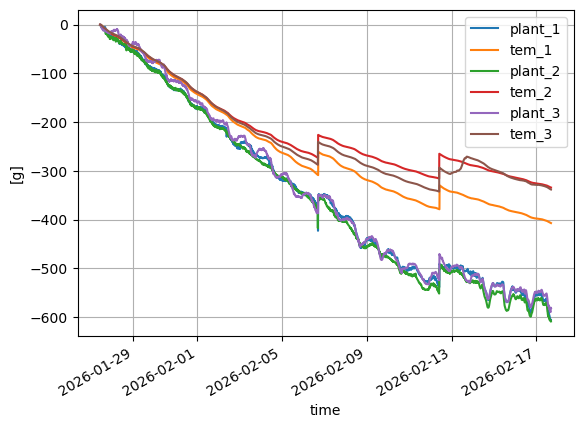

In [298]:
# grid=True affiche une grille, ylabel spécifie le texte qui s'affiche sur l'axe y
df.plot(grid=True, ylabel="[g]")

Les sauts dans les courbes (particulièrement visibles sur les courbes des pots témoins) sont dûs à quelques arrosages pour maintenir les plants de maïs en vie jusqu'au bout de l'expérience.

En dehors de cela, que pensez-vous de l'allure des courbes des 3 plants de maïs ? Comment expliquer ces petites vagues qui semblent indiquer que l'ensemble pot + plante augmente en masse la nuit ?

Ici, l'idée est d'éveiller l'esprit critique des étudiant·es face aux mesures des balances qui semblent avoir été perturbées par quelque chose de non-identifié. Cela sert aussi d'illustration et de la difficulté de mettre en oeuvre une expérience robuste (#Olivier) et fiable.

Pour faciliter l'interprétation physiologique des mesures, on va ré-utiliser les données des balances de l'année 2025 pour la première partie du TP. Rassurez-vous, on utilisera bien les données de 2026 pour le reste du TP !

In [312]:
df = pd.read_csv('data/balances-2025.csv', sep=';')
df['time'] = pd.to_datetime(df['time'], unit='d', origin="1899-12-30")
df = df.set_index('time')

Pour vous aider, nous vous guiderons encore pour les questions 1 et 3 ci-dessous.

### Question 1

Ajoutez une nouvelle colonne ```evap``` au DataFrame. Cette colonne doit contenir l'**évaporation** cumulée moyenne (en g d'eau) des 3 pots témoins.

In [300]:
# Votre code ci-dessous

#### Correction

Méthode n°1 (la plus simple) : on somme les 3 colonnes ```tem_i```, on divise le résultat par 3, et on prend l'opposé :

In [313]:
df['evap'] = -(df['tem_1'] + df['tem_2'] + df['tem_3'])/3
df.head()

,plant_1,tem_1,plant_2,tem_2,plant_3,tem_3,evap
time,,,,,,,
2025-01-30 13:57:14.688000198,0.00,0.00,0.00,0.00,0.00,0.00,-0.000000
2025-01-30 14:07:15.167999801,-2.24,-0.04,-1.51,-0.02,0.39,-0.03,0.030000
2025-01-30 14:17:13.920000077,-2.26,-0.08,-2.47,-0.07,0.48,-0.05,0.066667
2025-01-30 14:27:14.400000311,-1.95,-0.11,-1.81,-0.10,0.54,-0.06,0.090000
2025-01-30 14:37:14.016000250,-1.80,-0.14,-2.79,-0.14,-1.99,-0.09,0.123333


Méthode n°2 : on sélectionne les 3 colonnes ```tem_i``` et on obtient la moyenne via la fonction ```mean()``` en spécifiant ```axis=1``` pour que la moyenne soit calculée le long des lignes et non le long des colonnes :

In [314]:
# Cette méthode à l'avantage d'illustrer la sélection multiple de colonnes, pas encore vue jusqu'ici
df['evap'] = -df[['tem_1', 'tem_2', 'tem_3']].mean(axis=1)
df.head()

,plant_1,tem_1,plant_2,tem_2,plant_3,tem_3,evap
time,,,,,,,
2025-01-30 13:57:14.688000198,0.00,0.00,0.00,0.00,0.00,0.00,-0.000000
2025-01-30 14:07:15.167999801,-2.24,-0.04,-1.51,-0.02,0.39,-0.03,0.030000
2025-01-30 14:17:13.920000077,-2.26,-0.08,-2.47,-0.07,0.48,-0.05,0.066667
2025-01-30 14:27:14.400000311,-1.95,-0.11,-1.81,-0.10,0.54,-0.06,0.090000
2025-01-30 14:37:14.016000250,-1.80,-0.14,-2.79,-0.14,-1.99,-0.09,0.123333


Nous n'avons plus besoin des colonnes ```tem_i```. Pour simplifier l'affichage du DataFrame pour la suite, on peut supprimer ces colonnes avec la fonction ```drop()``` et en précisant les colonnes à supprimer :

In [315]:
df = df.drop(columns=['tem_1', 'tem_2', 'tem_3'])
df.head()

,plant_1,plant_2,plant_3,evap
time,,,,
2025-01-30 13:57:14.688000198,0.00,0.00,0.00,-0.000000
2025-01-30 14:07:15.167999801,-2.24,-1.51,0.39,0.030000
2025-01-30 14:17:13.920000077,-2.26,-2.47,0.48,0.066667
2025-01-30 14:27:14.400000311,-1.95,-1.81,0.54,0.090000
2025-01-30 14:37:14.016000250,-1.80,-2.79,-1.99,0.123333


### Question 2

Ajoutez 3 nouvelles colonnes `trans_1`, `trans_2` et `trans_3` au DataFrame. La colonne `trans_i` doit contenir la **transpiration** cumulée (en g d'eau) du plant de maïs $i$.

In [304]:
# Votre code ci-dessous

#### Correction

On prend l'opposée de la colonne ```plant_i``` et on soustrait l'évaporation moyenne pour passer de l'évapotranspiration à la transpiration :

In [316]:
df['trans_1'] = -df['plant_1'] - df['evap']
df['trans_2'] = -df['plant_2'] - df['evap']
df['trans_3'] = -df['plant_3'] - df['evap']

Comme précédemment, on peut se débarrasser des colonnes ```plant_i``` :

In [317]:
df = df.drop(columns=['plant_1', 'plant_2', 'plant_3'])
df.head()

,evap,trans_1,trans_2,trans_3
time,,,,
2025-01-30 13:57:14.688000198,-0.000000,0.000000,0.000000,0.000000
2025-01-30 14:07:15.167999801,0.030000,2.210000,1.480000,-0.420000
2025-01-30 14:17:13.920000077,0.066667,2.193333,2.403333,-0.546667
2025-01-30 14:27:14.400000311,0.090000,1.860000,1.720000,-0.630000
2025-01-30 14:37:14.016000250,0.123333,1.676667,2.666667,1.866667


### Question 3

Représentez graphiquement la transpiration cumulée des 3 plants de maïs ainsi que l'évaporation cumulée moyenne au cours du temps.

_Hint_ : `df.plot()`.

In [307]:
# Votre code ci-dessous

#### Correction

Il existe plein de façon de représenter graphiquement des données en Python, par exemple via les bibliothèques [Matplotlib](https://matplotlib.org/) et [Seaborn](https://seaborn.pydata.org/). Ici, comme l'objectif est plus d'explorer les données que de produire de magnifiques graphiques prêts à être publiés, on va se contenter de la fonction `plot()` de Pandas (qui utilise en réalité Matplotlib derrière). Celle-ci s'applique directement à un DataFrame, à une colonne spécifique d'un DataFrame ou à une portion quelconque de DataFrame.

<Axes: xlabel='time', ylabel="[g d'eau]">

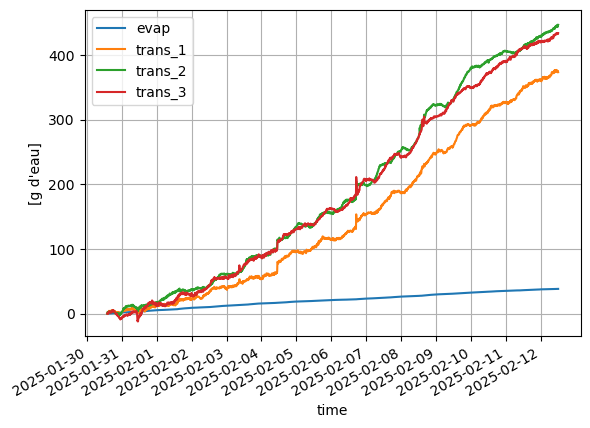

In [319]:
# On importe la bibliothèque Numpy de Python sous l'alias conventionnel "np". Cette bibliothèque est très utile, mais ici on ne l'utilise que de manière anecdotique pour légèrement améliorer l'affichage de notre graphique (voir la fonction np.unique() ci-dessous).
import numpy as np

# Le paramètre optionnel xticks permet de dire à Pandas que l'on veut que toutes les dates soient affichées sur l'axe des x. Essayez sans, vous verrez que c'est moins lisible.
df.plot(grid=True, xticks=np.unique(df.index.date), ylabel="[g d'eau]")

*Remarque* :
- Pandas affiche automatiquement les données en fonction du temps parce que nous avons définit la colonne `time` comme indices du DataFrame via la fonction `set_index()` plus haut. Sans cela, il aurait fallu préciser à Pandas qu'afficher sur l'axe des x ;
- sur le graphique ci-dessus, l'espace séparent deux lignes verticales correspond à une journée (24 heures), de 00:00 à 00:00.

### Question 4


Note pour les chercheur·ses impliqué·es : les étudiant·es répondent à l'une des 4 versions de la question ci-dessous selon leur groupe de TP.

Pour faciliter l'interprétation, représentez graphiquement la transpiration cumulée de la plante 1 sur une période plus courte, entre le 07-02-2025 et le 11-02-2025.


Pour faciliter l'interprétation, représentez graphiquement la transpiration cumulée de la plante 2 sur une période plus courte, entre le 08-02-2025 et le 12-02-2025.

Pour faciliter l'interprétation, représentez graphiquement la transpiration cumulée de la plante 3 sur une période plus courte, entre le 06-02-2025 et le 10-02-2025.

Pour faciliter l'interprétation, représentez graphiquement la transpiration cumulée de la plante 1 sur une période plus courte, entre le 06-02-2025 et le 9-02-2025.

In [309]:
# Votre code ci-dessous

#### Correction

On utilise à nouveau la fonction `plot()`, mais cette fois sur une sélection précise du DataFrame via `loc[]` :

<Axes: xlabel='time', ylabel="[g d'eau]">

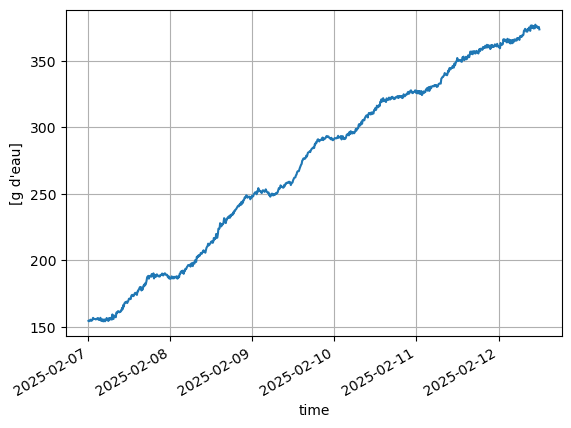

In [311]:
df_cropped = df.loc["2025-02-07":"2025-02-11", 'trans_1']

df_cropped.plot(grid=True, xticks=np.unique(df_cropped.index.date), ylabel="[g d'eau]")

<Axes: xlabel='time', ylabel="[g d'eau]">

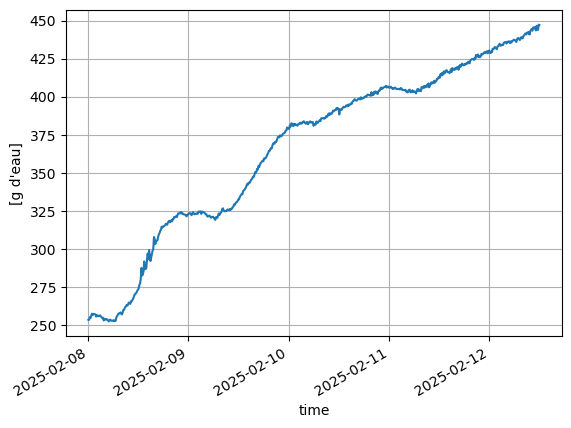

In [320]:
df_cropped = df.loc["2025-02-08":"2025-02-12", 'trans_2']

df_cropped.plot(grid=True, xticks=np.unique(df_cropped.index.date), ylabel="[g d'eau]")

<Axes: xlabel='time', ylabel="[g d'eau]">

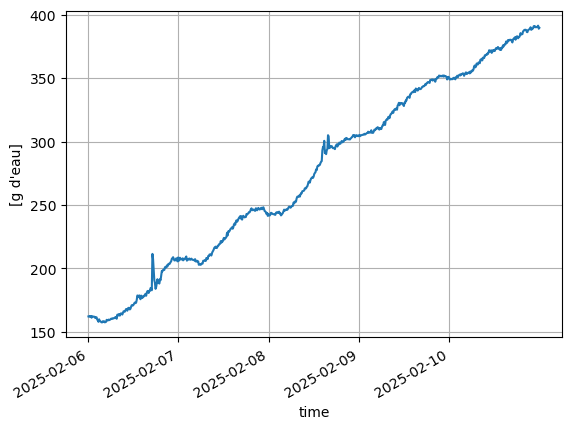

In [321]:
df_cropped = df.loc["2025-02-06":"2025-02-10", 'trans_3']

df_cropped.plot(grid=True, xticks=np.unique(df_cropped.index.date), ylabel="[g d'eau]")

<Axes: xlabel='time', ylabel="[g d'eau]">

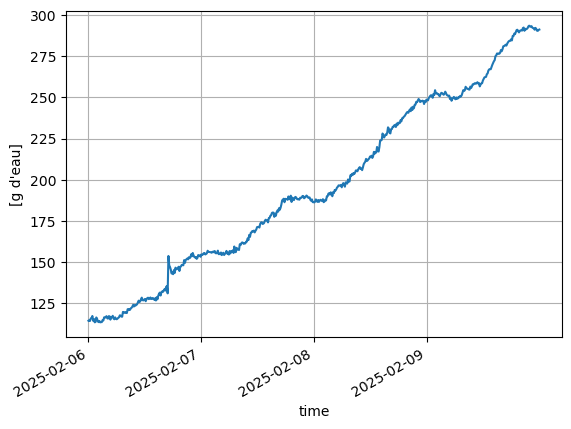

In [322]:
df_cropped = df.loc["2025-02-06":"2025-02-09", 'trans_1']

df_cropped.plot(grid=True, xticks=np.unique(df_cropped.index.date), ylabel="[g d'eau]")

### Question 5

Assez de manipulation de données, passons à leur interpretation : comment évoluent la transpiration et l'évaporation au cours d'une journée ? Et sur plusieurs jours ?

## Les données des encodeurs rotatifs

Pour mesurer la croissance d'une feuille d'un plant de maïs, son extrémité est attachée à une ficelle. Cette ficelle passe par une poulie accrochée au-dessus du plant et est attachée à son autre extrémité à une petite masse qui permet de maintenir la ficelle tendue. Lorsque la jeune feuille s'allonge, la petite masse descend et fait tourner la poulie. La croissance de la feuille peut alors être mesurée en "tours de poulie" via un petit dispositif électronique (en encodeur rotatif) qui suit mécaniquement le mouvement de la poulie.

On commence par importer les données du fichier CSV de manière similaire à précédemment pour les données des balances :

In [249]:
df = pd.read_csv('data/croissance-2026.csv', sep=';')

# Conversion de la colonne 'time' en objet datetime
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y %H:%M:%S')

# On utilise la colonne 'time' comme indice du DataFrame
df = df.set_index('time')

# Affichage des 5 premières lignes
df.head()

,enc_1,enc_2,enc_3,enc_4,enc_5,enc_6
time,,,,,,
2026-01-27 10:12:58,1,0,2,-1,2,0
2026-01-27 10:13:58,1,0,2,-1,2,1
2026-01-27 10:14:58,1,0,2,-2,2,1
2026-01-27 10:15:58,1,0,2,-2,2,1
2026-01-27 10:16:58,1,0,2,-2,2,1


Que des "0" dans les 5 premières lignes du DataFrame. Pour s'assurer qu'il contient bien quelque chose, on peut utilise la fonction `tail()` qui affiche les 5 dernières lignes du DataFrame :

In [250]:
df.tail()

,enc_1,enc_2,enc_3,enc_4,enc_5,enc_6
time,,,,,,
2026-02-17 16:12:19,-190,131,570,-628,2,672
2026-02-17 16:13:19,-190,131,570,-628,2,672
2026-02-17 16:14:19,-190,131,570,-628,2,672
2026-02-17 16:15:19,-190,131,570,-628,2,672
2026-02-17 16:16:19,-190,131,570,-628,2,672


C'est bon, le DataFrame contient bien quelque chose. Par contre, la colonne `pot_5` ne contient que des 0. On la supprime :

In [251]:
df = df.drop(columns=['enc_5'])

Maintenant, c'est à vous de jouer !

### Question 1

Les données enregistrées par les encodeurs rotatifs ne correspondent pas *directement* à des longueurs de feuilles. Chaque variation de $\pm 1$ enregistrée par un encodeur rotatif correspond à un 1/80e de tour de poulie. Sachant que le diamètre de la poulie est de 2,6 cm, convertissez les données des encodeurs rotatifs en centimètres d'élongation des feuilles. Affichez le résultat sur un graphique, en fonction du temps.

*Hint* :
- le signe des valeurs mesurées par les encodeurs rotatifs traduit le sens de rotation de la poulie. Pensez-vous que cette information soit pertinente ici ?
- `from math import pi` vous permettra d'utiliser la variable `pi` dans votre code.

In [252]:
# Votre code ci-dessous

#### Correction

D'abord, le sens de rotation de la poulie n'a pas d'intérêt ici. On utilise la fonction `abs()` (valeur absolue) sur l'ensemble des données pour s'assurer de ne plus traiter que des valeurs positives par la suite :

In [253]:
df = abs(df)

# Affichage des 5 dernières lignes pour voir ce qu'on fait
df.tail()

,enc_1,enc_2,enc_3,enc_4,enc_6
time,,,,,
2026-02-17 16:12:19,190,131,570,628,672
2026-02-17 16:13:19,190,131,570,628,672
2026-02-17 16:14:19,190,131,570,628,672
2026-02-17 16:15:19,190,131,570,628,672
2026-02-17 16:16:19,190,131,570,628,672


Ensuite, on convertit les "unités potentiomètres" (1/80e de tour de poulie d'un diamètre de 2,6 cm) en centimètres :

In [254]:
from math import pi

df = df * 1/80 * pi * 2.6

# Affichage des 5 dernières lignes pour voir ce qu'on fait
df.tail()

,enc_1,enc_2,enc_3,enc_4,enc_6
time,,,,,
2026-02-17 16:12:19,19.399335,13.375331,58.198004,64.119906,68.612384
2026-02-17 16:13:19,19.399335,13.375331,58.198004,64.119906,68.612384
2026-02-17 16:14:19,19.399335,13.375331,58.198004,64.119906,68.612384
2026-02-17 16:15:19,19.399335,13.375331,58.198004,64.119906,68.612384
2026-02-17 16:16:19,19.399335,13.375331,58.198004,64.119906,68.612384


Enfin, on affiche les données sur un graphique, en fonction du temps :

<Axes: xlabel='time', ylabel='[cm]'>

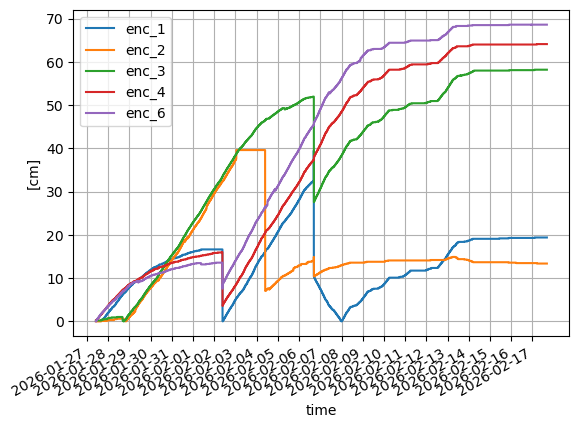

In [255]:
 df.plot(grid=True,
        xticks=np.unique(df.index.date),
        ylabel="[cm]")

Avant de passer à la suite, prenez le temps d'observer le graphique et d'essayer de comprendre l'allure des courbes des différents encodeurs.

### Question 2

Les discontinuités visibles sur le graphe précédent sont dues aux manipulations de vos chers assistants lorsque la ficelle est transférée d'une feuille à l'autre et que la masse est remontée de quelques dizaines de centimètres.

Sur des graphiques différents, affichez la courbe de croissance mesurée par les encodeurs n°1, n°4 et n°6 entre le 27-01-2026 et le 01-02-2026. Quelle dynamique de croissance observez-vous ? D'après vous, si nous avions continuer à mesurer la croissance de ces feuilles, comment se prolongeraient ces 3 courbes ?

In [256]:
# Votre code ci-dessous

#### Correction

On utilise encore la fonction `plot()`, mais cette fois en indiquant la colonne et l'intervalle de temps à afficher. Rappelez-vous que le format de date à utiliser est `YYYY:MM:DD`.

<Axes: xlabel='time'>

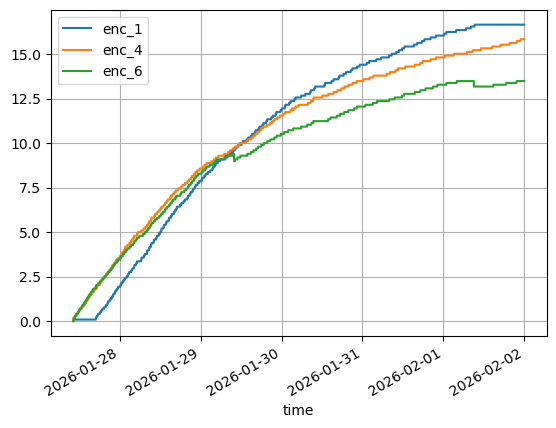

In [257]:
df.loc['2026-01-27':'2026-02-01', ['enc_1', 'enc_4', 'enc_6']].plot(grid=True)

### Question 3

Affichez maintenant la croissance mesurée par l'encodeur n°1, 4 et 6 entre le 03-02-2026 et le 05-02-2026. Quelle dynamique journalière observez-vous ?


In [258]:
# Votre code ci-dessous

#### Correction

<Axes: xlabel='time'>

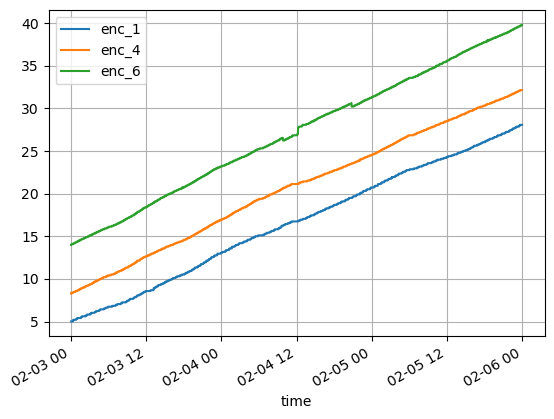

In [259]:
df.loc['2026-02-03':'2026-02-05', ['enc_1', 'enc_4', 'enc_6']].plot(grid=True)

### Question 4

Enfin, affichez la croissance mesurée par les encodeurs n°4 et 6 sur les mêmes feuilles mais quelques jours plus tard, entre le 08-02-2026 et le 09-02-2026. Quelle dynamique journalière observez-vous ?

In [260]:
# Votre code ci-dessous

#### Correction

<Axes: xlabel='time'>

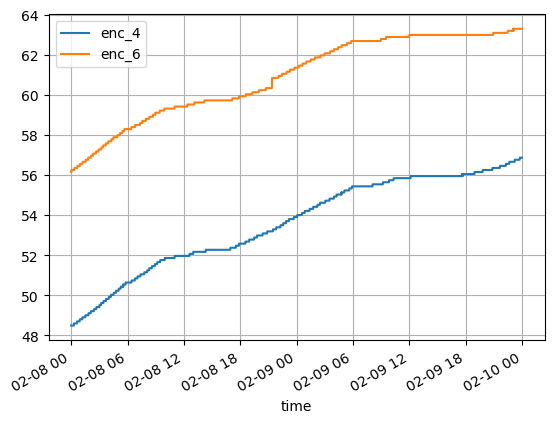

In [261]:
df.loc['2026-02-08':'2026-02-09', ['enc_4', 'enc_6']].plot(grid=True)

### Question 5

Comment expliquer ces deux dynamiques de croissance journalière différentes ?

*Hints :*
- retournez au graphique généré à la question 1 pour observer le passage d'une dynamique journalière à l'autre.
- observez la dynamique de croissance dans la nuit du 13-02. Comment expliquer cela ? Que s'est-il passé le 12-02 d'après vous ?

Ici, l'objectif est de discuter avec les étudiant·es du rôle du statut hydrique/de la turgescence dans la croissance de la plante.

La dynamique journalière linéaire des premiers jours s'explique par un apport en eau suffisant. Au fur et à mesure que la quantité d'eau disponible dans le pot diminue, la dynamique prend une autre allure : la croissance ralentit la journée jusqu'à atteindre un plateau aux alentours de midi (diminution de la turgescence car les plants perdent de l'eau par transpiration) et reprend la nuit quand les stomates se ferment. Plus la quantité d'eau disponible dans le pot diminue, plus la croissance journalière "s'aplatit" jusqu'à devenir pratiquement nulle. On voit qu'elle reprend dans la nuit du 13-02 suite à un (petit) arrosage le 12-02, qui semble être rapidement entièrement consommé.

(Note : en parallèle, le stress hydrique impacte aussi la photosynthèse.

## Bonus : les données du poromètre

Comme précédemment, on commence par lire les données contenues dans le fichier CSV et on convertit les dates et heures en objet `datetime` pour faciliter leur manipulation par la suite :

In [262]:
import pandas as pd

df = pd.read_csv('data/porometre-2026.csv', sep=',')

# Concaténation des colonnes 'date' et 'heure' et conversion en datetime via to_datetime()
df['time'] = df['date'] + ' ' + df['heure']
df['time'] = pd.to_datetime(df['time'], format='%d/%m/%Y %H:%M')

# Les colonnes 'date' et 'heure' sont remplacées par l'unique colonne 'time', on les supprime donc du DataFrame
df = df.drop(columns=['date', 'heure', 'remarque'])

# On affiche les 5 premières lignes du DataFrame
df.head()

,rang_f,état_f,face_f,cond,PAR,time
0,5,Bien développée,Abaxiale,144,163,2026-02-10 15:24:00
1,5,Bien développée,Adaxiale,19,163,2026-02-10 15:26:00
2,1,Vieille,Abaxiale,30,122,2026-02-10 15:29:00
3,1,Vieille,Adaxiale,24,122,2026-02-10 15:30:00
4,3,Bien développée,Abaxiale,76,136,2026-02-10 15:42:00


### Question 1

A l'aide de graphique, montrez l'influence (ou non) d'une variable au choix (date ou heure de la mesure, rang de la feuille, face de la feuille, position sur la feuille, état de la feuille ou PAR) sur la conductance stomatique.

*Hint* :
- la fonction `df.groupby()` permet par exemple de calculer la moyenne de la conductance stomatique mesurée sur les faces abaxiales et adaxiales respectivement : ```df.groupby('face_f')['cond'].mean()``` ;
- pour explorer les données, la fonction `describe()` est intéressante. Par exemple, ```df.groupby('face_f')['cond'].describe()``` ;
- la fonction `df.scatter(x=<abscisses des points à afficher>, y=<ordonnées des points à afficher>)` permet d'afficher un "[scatter plot](https://en.wikipedia.org/wiki/Scatter_plot)" (ou "nuage de points" en français) ;
- la fonction `df.boxplot(column=<la colonne à afficher>, by=<les différentes catégories>)` permet d'afficher un "[box plot](https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches)" (ou "boîte à moustaches" en français).

In [263]:
# Votre code ci-dessous

#### Correction

Quelques possibilités (c'est non-exhaustif, idées bienvenues) de choses à faire sont présentées ci-dessous.

##### Nuage de points : conductance stomatique vs. PAR

On utilise la fonction `df.plot.scatter()` de Pandas. Celle-ci prend deux arguments, correspondant aux noms des colonnes à afficher.

<Axes: xlabel='PAR', ylabel='cond'>

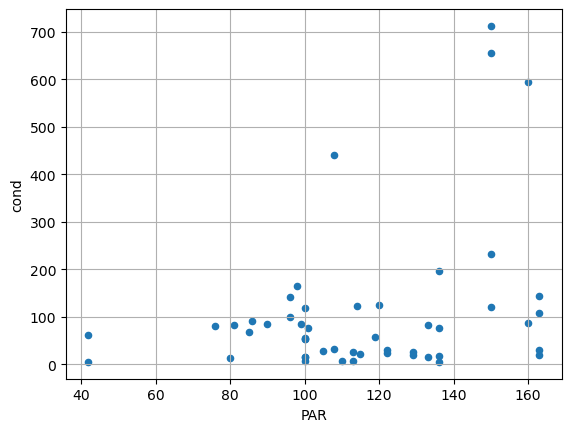

In [264]:
df.plot.scatter(x='PAR', y='cond', grid=True)

On utilise `scipy.stats.linregress` pour faire une régression linéaire.

In [265]:
from scipy.stats import linregress

# On spécifie nan_policy='omit' car PAR n'a pas toujours été mesuré
lreg = linregress(df['PAR'], df['cond'], nan_policy='omit')

On affiche le résultat de la régression linéaire sur le nuage de point. On se sert pour cela des paramètres `intercept` et `slope` de l'objet `lreg` qui permettent de reconstruire la droite de régression dans une nouvelle colonne `lreg` :

<Axes: xlabel='PAR', ylabel='cond'>

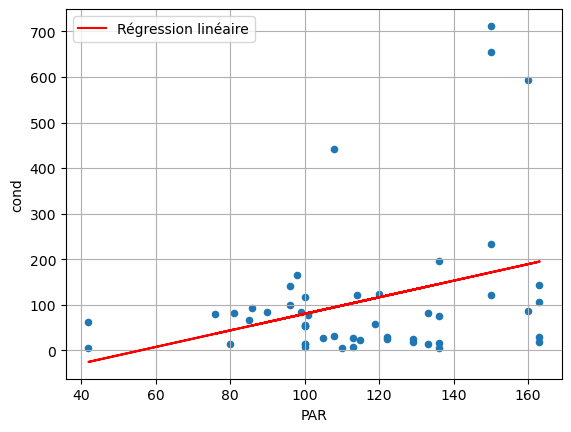

In [266]:
df['lreg'] = lreg.intercept + lreg.slope * df['PAR']

# Note : ici, on récupère l'objet axes retourné par la fonction pour pouvoir le réutiliser juste en dessous
ax = df.plot.scatter(x='PAR', y='cond')
df.plot(x='PAR', y='lreg', ax=ax, color='red', label="Régression linéaire", grid=True)

##### Box plot : conductance stomatique vs. face de la feuille

Pour se faire une rapide idée, on peut commencer par utiliser la fonction `describe()` de Pandas après avoir groupé les données de conductance par face (abaxiale ou adaxiale) :

In [267]:
df.groupby('face_f')['cond'].describe()

,count,mean,std,min,25%,50%,75%,max
face_f,,,,,,,,
Abaxiale,29.0,156.379310,189.668774,7.0,57.0,83.0,142.0,712.0
Adaxiale,21.0,42.428571,54.256402,5.0,15.0,24.0,32.0,233.0


La fonction `describe()` retourne, pour chaque face, le nombre de valeurs, la moyenne, la variance, le minimum, le maximum et les quartiles. Pour rendre cela plus visuel, on peut afficher un "boxplot" des valeurs de conductances pour les deux faces :

<Axes: title={'center': 'cond'}, xlabel='face_f'>

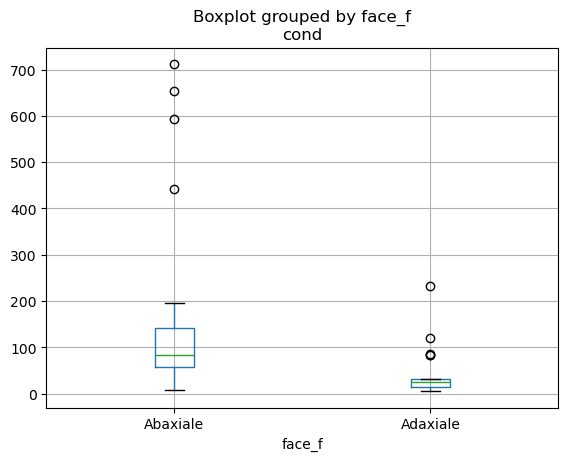

In [268]:
df.boxplot(column='cond', by='face_f')

### Question 2

Faites des hypothèses sur les raisons physiologiques expliquant l'influence (ou non) de cette variable sur la conductance stomatique.